## Vežbe 4 - Sunce

1. Podesiti posmatrača tako da se nalazi u Beogradu (geografske koordinate u stepenima su 44.8125N i 20.4612E) i da mu je vreme posmatranja datum i vreme početka održavanja ovih vežbi. U ovoj vežbi će definisani posmatrač da se bavi Suncem, stoga je potrebno definisati i Sunce za našeg posmatrača.

In [2]:
import ephem

belgrade = ephem.Observer()
belgrade.lat = "44.8125"
belgrade.lon = "20.4612"
belgrade.date = (2022, 11, 17, 9, 15, 0) #UTC+1

sun = ephem.Sun()

2. Odrediti vreme prethodnog izlaska Sunca, vreme lokalnog podneva i vreme zalaska (*rising, transit, setting*) Sunca za taj datum u lokalnom vremenu (*localtime*) i oštampati u formatu čč:mm:ss.

In [3]:
from datetime import datetime

def print_local(date):
    print(ephem.localtime(date).strftime("%H:%M:%S"))
    print()

print("Vreme prethodnog izlaska: ")
print_local(belgrade.previous_rising(sun))

print("Vreme lokalnog podneva: ")
print_local(belgrade.next_transit(sun))

print("Vreme narednog zalaska: ")
print_local(belgrade.next_setting(sun))

Vreme prethodnog izlaska: 
06:37:19

Vreme lokalnog podneva: 
11:23:04

Vreme narednog zalaska: 
16:08:22



3. U prethodnom zadatku vidimo da Sunce nije tačno u 12 časova na najvećem položaju u toku dana (izuzev par dana u godini). Ovo je posledica toga što se za merenje vremena koristi srednje solarno vreme koje usrednjava kretanje Sunca u toku godine. Pravo prividno kretanje Sunca u toku godine zavisi od nagiba Zemljine ose i od ekscentriciteta Zemljine orbite oko Sunca, te nije sasvim uniformno. Kriva koja prikazuje odstupanje vremena kada se Sunce zapravo nalazi na najvišem položaju od podneva, mereno srednjim solarnim vremenom, naziva se jednačinom vremena (eng. *Equation of Time*). Prikazati datu zavisnost u toku cele ove godine. Kriva se može prikazati i u lokalnom vremenu (tada će postojati dva skoka kao posledica letnjeg/zimskog merenja vremena). 

    \[opciono: ovde se mogu posebno plotovati i komponente koje doprinose, nagib Zemljine ose i ekscentricitet zemljine orbite]

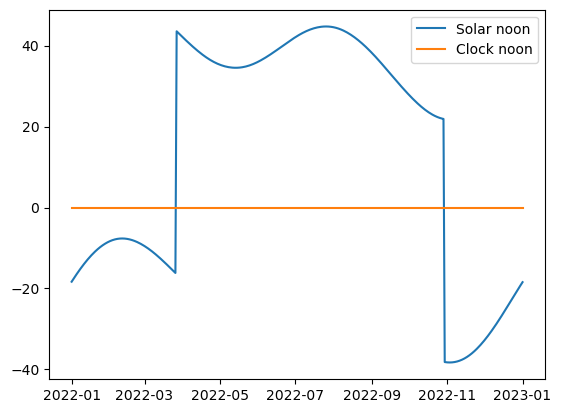

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

days = pd.date_range(start='2022-01-01', end='2023-01-01', periods=366)
    
differences = []
for day in days:
    belgrade.date = day
    local_noon = ephem.localtime(belgrade.next_transit(sun))
    clock_noon = local_noon.replace(hour=12, minute=0, second=0, microsecond=0)
    differences.append((local_noon-clock_noon).total_seconds()/60)

plt.plot(days, differences, label="Solar noon")
plt.plot(days, np.zeros(len(days)), label="Clock noon")
plt.legend()
plt.show()

4. Ukoliko bismo pratili položaj Sunca u tačno isto (lokalno) vreme tokom cele jedne godine, on bi opisao petlju poznatu kao analema. Prikazati analemu koja bi se dobila posmatrajući Sunce svakog dana u 12:00:00 iz Beograda. Na grafiku ubeležiti tačke prolećne i jesenje ravnodnevnice, kratkodnevnice i dugodnevnice. Na drugom i trećem grafiku zasebno nacrtati analemu koja odgovara posmatranjima u 08:00:00 i 15:30:00 po lokalnom vremenu.

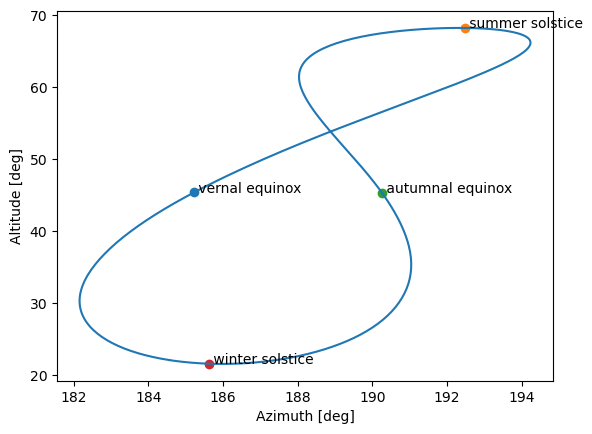

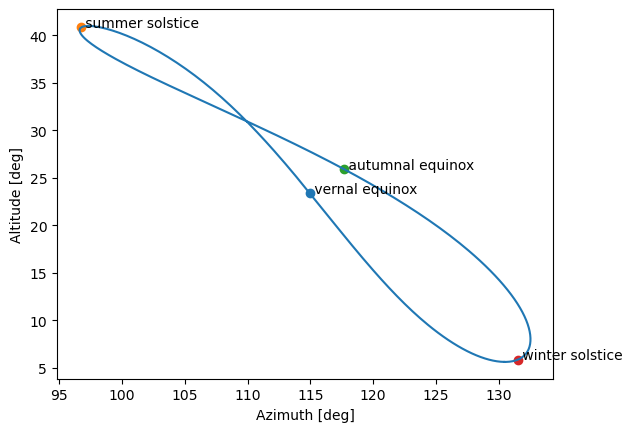

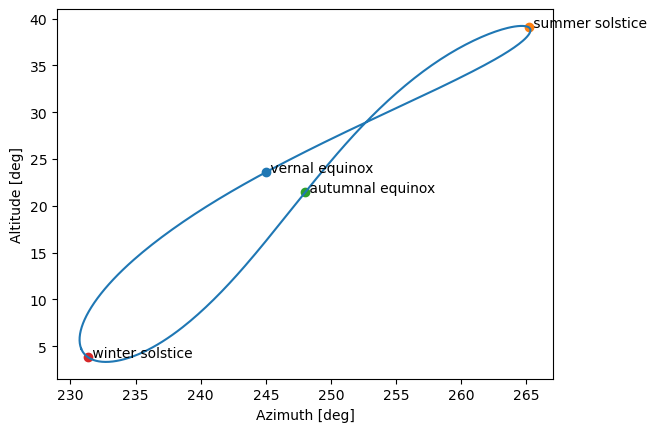

In [4]:
def plot_analemma(time):
    def annotate_point(txt, x, y):
        plt.scatter(x, y)
        plt.annotate(txt, (x, y))
    
    days = pd.date_range(start=f'2022-01-01 {time}', end=f'2023-01-01 {time}', periods=366)

    alts = []
    azs = []
    for day in days:
        belgrade.date = day
        sun.compute(belgrade)
        
        azimuth = np.degrees(sun.az)
        altitude = np.degrees(sun.alt)
        azs.append(azimuth)
        alts.append(altitude)
        
        # equinox and solstice dates
        date = str(day)[:10]
        if date == "2022-03-21":
            annotate_point(" vernal equinox", azimuth, altitude)
            
        if date == "2022-06-21":
            annotate_point(" summer solstice", azimuth, altitude)
            
        if date == "2022-09-21":
            annotate_point(" autumnal equinox", azimuth, altitude)
            
        if date == "2022-12-23":
            annotate_point(" winter solstice", azimuth, altitude)
            
    plt.plot(azs, alts)
    plt.xlabel("Azimuth [deg]")
    plt.ylabel("Altitude [deg]")
    plt.show()
    
plot_analemma("11:00") # UTC-1
plot_analemma("07:00")
plot_analemma("14:30")

5. Postoje različti tipovi sumraka pri zalasku Sunca, a definišu se posmatrajući pod kojim uglom se Sunce nalazi ispod horizonta. Najpre imamo civilni sumrak kada je Sunce između 0 i 6 stepeni ispod horizonta, zatim sledi nautički mrak izmešu 6 i 12 stepeni, pa astronomski mrak izmešu 12 i 18 stepeni, a kada se Sunce nađe na 18 ili više stepeni ispod horizonta, tada otpočinje noć. Paket **pyephem** koristi krajnju ivicu prividnog Sunca za računanje zalaska, dok se standardne definicije mahom baziraju na centru Sunca (opcija **use_center=True**). Odrediti i odštampati vremena zalaska za obe definicije i razliku u vremenu između njih.

In [5]:
belgrade.date = datetime.now()

def print_dusk(txt, horizon):
    print(txt)
    
    belgrade.horizon = horizon
    center = ephem.localtime(belgrade.next_setting(sun, use_center=True))
    edge = ephem.localtime(belgrade.next_setting(sun, use_center=False))
    print("  cent: " + center.strftime("%H:%M:%S"))
    print("  edge: " + edge.strftime("%H:%M:%S"))
    
    diff = edge-center
    print("  diff: " + str(diff.seconds) + " seconds \n")


print_dusk("Civil dusk:", "-6")
print_dusk("Nautical dusk", "-12")
print_dusk("Astronomical dusk", "-18")

Civil dusk:
  cent: 16:39:06
  edge: 16:40:32
  diff: 85 seconds 

Nautical dusk
  cent: 17:13:56
  edge: 17:15:30
  diff: 94 seconds 

Astronomical dusk
  cent: 17:48:38
  edge: 17:50:10
  diff: 92 seconds 



6. Nacrtati sve oblasti sumraka u Beogradu (po lokalnom vremenu), gde su na y-osi vremena u toku jednog dana, a na x-osi meseci u tekućoj godini.

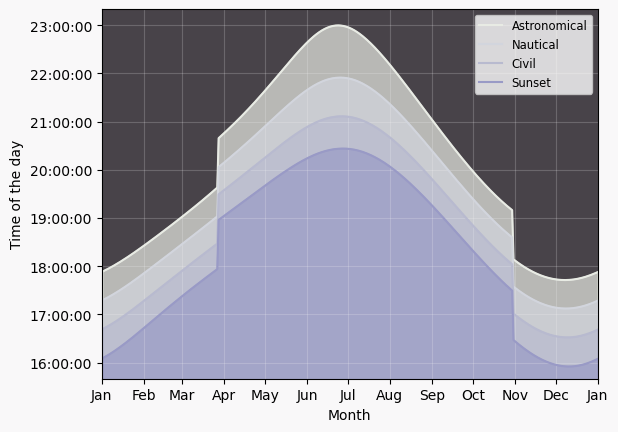

In [6]:
from matplotlib.ticker import FuncFormatter

def plot_twilights(observer):
    @FuncFormatter
    def time_formatter(x, pos):
        return f"{int(x//3600):02d}:{int((x%3600)//60):02d}:{int(x%60):02d}"

    min_y = 86400
    max_y = 0
    
    days = pd.date_range(start='2022-01-01', end='2022-12-31', periods=365)

    horizons = ["-18", "-12", "-6", "0"]
    twilights = ["Astronomical", "Nautical", "Civil", "Sunset"]
    colors = ["#e8ebe4", "#d2d5dd", "#b8bacf", "#999ac6"]

    for horizon in range(4):
        times = []
        dates = []
        for day in days:
            observer.date = day
            observer.horizon = horizons[horizon]
            try:
                sunset = ephem.localtime(observer.next_setting(sun, use_center=True))
                times.append((sunset-day).seconds)
            except:
                times.append(86400)
            dates.append(datetime.strptime(str(day)[:10], "%Y-%m-%d").timetuple().tm_yday)

        plt.plot(dates, times ,colors[horizon], label=twilights[horizon])
        plt.fill_between(dates, times, color=colors[horizon], alpha=0.7)
        
        if min(times) < min_y:
            min_y = min(times)
            
        if max(times) > max_y:
            max_y = max(times)
            
    
    plt.xlabel("Month")
    plt.ylabel("Time of the day")
    plt.xticks(np.cumsum([0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]),["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec", "Jan"])
    min_y = (min_y//3600)*3600+3600
    max_y = (max_y//3600)*3600+3600

    h_between = int((max_y-min_y+3600)/3600)
    plt.yticks(np.linspace(min_y, max_y, h_between))
    if max_y > 86400:
        max_y = 86400-1200
        
    plt.gca().set_xlim([0, 365])
    plt.gca().set_ylim([min_y-1200, max_y+1200])
    plt.gca().yaxis.set_major_formatter(time_formatter)
    plt.legend(fontsize="small")
    plt.gca().set_facecolor("#484349")
    plt.gcf().set_facecolor("#f9f8f9")
    plt.grid(color="#f9f8f9", alpha=0.2)
    plt.show()
    
plot_twilights(belgrade)

7. Nacrtati isti grafik kao u prethodnom zadatku za Sankt Petersburg. Kako se sumraci razlikuju u odnosu na Beograd?

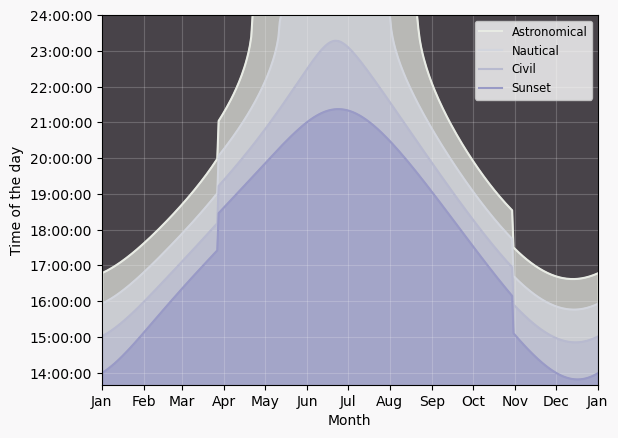

In [52]:
st_petersburg = ephem.Observer()
st_petersburg.lat = "59.9375"
st_petersburg.lon = "30.3086"

plot_twilights(st_petersburg)

8. Uzimajući da zalazak Sunca traje od prvog kontakta donjeg ruba Sunčevog diska sa horizontom do poslednjeg kontakta gornjeg ruba sa horizontom, odrediti dužinu trajanja zalaska Sunca iz Beograda za današnji dan i odštampati. Potom nacrtati grafik trajanja zalaska Sunca u toku čitave tekuće godine (za Beograd).

Zalazak sunca je danas trajao 263.782591 sekundi.


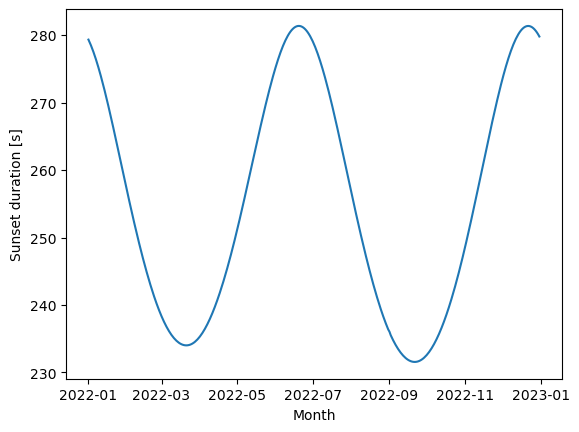

In [8]:
def get_sunset_time(date):
    belgrade.date = date

    belgrade.horizon = "0"
    start_t = ephem.localtime(belgrade.next_setting(sun, use_center=False))

    belgrade.horizon = str(-1*sun.size/3600)
    end_t = ephem.localtime(belgrade.next_setting(sun, use_center=False))
    
    return (end_t-start_t).total_seconds()
    
    
print(f"Zalazak sunca je danas trajao {get_sunset_time(datetime.now())} sekundi.")


days = pd.date_range(start='2022-01-01', end='2022-12-31', periods=365)
sunset_times = []

for day in days:
    sunset_times.append(get_sunset_time(day))

plt.plot(days, sunset_times)
plt.xlabel("Month")
plt.ylabel("Sunset duration [s]")
plt.show()
